In [1]:
#This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'c2a10b63-e31b-49b5-ac6a-eaccae2b4b80',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

{'status': {'timestamp': '2024-07-01T16:15:26.697Z', 'error_code': 0, 'error_message': None, 'elapsed': 40, 'credit_count': 1, 'notice': None, 'total_count': 10114}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11491, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [2]:
type(data)

dict

In [3]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11491,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.971907e+07,1.971907e+07,False,NaN,1,NaN,NaN,None,2024-07-01T16:14:00.000Z,63210.260823,2.426083e+10,77.9060,0.501985,2.708239,3.914305,-6.530500,7.002079,-3.279280,1.246447e+12,53.7747,1.327415e+12,None,2024-07-01T16:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-01 16:15:38.353707
1,1027,Ethereum,ETH,ethereum,9116,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201893e+08,1.201893e+08,True,NaN,2,NaN,NaN,None,2024-07-01T16:13:00.000Z,3467.462708,1.192464e+10,67.7537,-0.123220,2.247191,5.569428,-8.726587,16.377553,6.906734,4.167521e+11,17.9531,4.167521e+11,None,2024-07-01T16:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-01 16:15:38.353707
2,825,Tether USDt,USDT,tether,90644,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.128750e+11,1.160769e+11,True,NaN,3,NaN,NaN,None,2024-07-01T16:13:00.000Z,0.998614,4.504613e+10,49.4078,0.017169,0.009560,-0.105702,-0.047431,-0.151232,-0.142272,1.127186e+11,4.8558,1.159160e+11,None,2024-07-01T16:13:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-01 16:15:38.353707
3,1839,BNB,BNB,bnb,2188,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475831e+08,1.475831e+08,False,NaN,4,NaN,NaN,None,2024-07-01T16:13:00.000Z,577.787307,1.684487e+09,19.0039,-0.096499,0.319673,2.686159,-3.079292,2.739835,4.359076,8.527167e+10,3.6734,8.527167e+10,None,2024-07-01T16:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-01 16:15:38.353707
4,5426,Solana,SOL,solana,696,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.626661e+08,5.792238e+08,True,NaN,5,NaN,NaN,None,2024-07-01T16:13:00.000Z,148.274899,1.882612e+09,45.9519,0.002053,3.546311,16.719465,-11.338837,7.315496,-17.065209,6.860177e+10,2.9596,8.588435e+10,None,2024-07-01T16:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-01 16:15:38.353707
5,3408,USDC,USDC,usd-coin,20633,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.245230e+10,3.245230e+10,False,NaN,6,NaN,NaN,None,2024-07-01T16:13:00.000Z,0.999857,4.543665e+09,59.3388,0.008606,-0.028896,-0.026857,-0.013882,-0.036742,-0.009400,3.244765e+10,1.3978,3.244765e+10,None,2024-07-01T16:13:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-01 16:15:38.353707
6,52,XRP,XRP,xrp,1346,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.568833e+10,9.998749e+10,False,NaN,7,NaN,NaN,None,2024-07-01T16:14:00.000Z,0.479145,7.897629e+08,83.0389,-0.406039,1.409271,1.111429,-7.849186,-7.667179,-17.994549,2.668279e+10,1.1495,4.791451e+10,None,2024-07-01T16:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-01 16:15:38.353707
7,11419,Toncoin,TON,toncoin,446,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.460027e+09,5.108372e+09,True,NaN,8,3.414167e+09,2.606251e+10,None,2024-07-01T16:13:00.000Z,7.633638,1.817979e+08,20.0770,-0.533000,0.457126,5.176804,21.265724,52.919918,54.437154,1.877895e+10,0.8090,3.899546e+10,None,2024-07-01T16:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-01 16:15:38.353707
8,74,Dogecoin,DOGE,dogecoin,1015,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",Na

In [5]:
def api_runner():
  global df
  url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
  parameters = {
    'start':'1',
    'limit':'15',
    'convert':'USD'
  }
  headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': 'c2a10b63-e31b-49b5-ac6a-eaccae2b4b80',
  }

  session = Session()
  session.headers.update(headers)

  try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    print(data)
  except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

  # Use this if you just want to keep it in a dataframe
  df2 = pd.json_normalize(data['data'])
  df2['timestamp'] = pd.to_datetime('now')
  df = df.append(df2)


  # Use this if you want to create a csv and append data to it
  #df = pd.json_normalize(data['data'])
  #df['timestamp'] = pd.to_datetime('now')
  #df

  #if not os.path.isfile(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv'):
      #df.to_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv', header='column_names')
  #else:
      #df.to_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv', mode='a', header=False)

  #Then to read in the file: df = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')

# If that didn't work try using the local host URL as shown in the video

In [ ]:
import os
from time import time, sleep

for i in range(333):
  api_runner
  print("API runner completed")
  sleep(60) #sleep for 1 minute
exit()

In [ ]:
df_api = pd.read_csv(r'/content/Python Scripts/API.csv')
df_api

In [13]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11491,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.971907e+07,1.971907e+07,False,NaN,1,NaN,NaN,None,2024-07-01T16:14:00.000Z,63210.260823,2.426083e+10,77.9060,0.501985,2.708239,3.914305,-6.530500,7.002079,-3.279280,1.246447e+12,53.7747,1.327415e+12,None,2024-07-01T16:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-01 16:15:38.353707
1,1027,Ethereum,ETH,ethereum,9116,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201893e+08,1.201893e+08,True,NaN,2,NaN,NaN,None,2024-07-01T16:13:00.000Z,3467.462708,1.192464e+10,67.7537,-0.123220,2.247191,5.569428,-8.726587,16.377553,6.906734,4.167521e+11,17.9531,4.167521e+11,None,2024-07-01T16:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-01 16:15:38.353707
2,825,Tether USDt,USDT,tether,90644,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.128750e+11,1.160769e+11,True,NaN,3,NaN,NaN,None,2024-07-01T16:13:00.000Z,0.998614,4.504613e+10,49.4078,0.017169,0.009560,-0.105702,-0.047431,-0.151232,-0.142272,1.127186e+11,4.8558,1.159160e+11,None,2024-07-01T16:13:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-01 16:15:38.353707
3,1839,BNB,BNB,bnb,2188,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475831e+08,1.475831e+08,False,NaN,4,NaN,NaN,None,2024-07-01T16:13:00.000Z,577.787307,1.684487e+09,19.0039,-0.096499,0.319673,2.686159,-3.079292,2.739835,4.359076,8.527167e+10,3.6734,8.527167e+10,None,2024-07-01T16:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-01 16:15:38.353707
4,5426,Solana,SOL,solana,696,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.626661e+08,5.792238e+08,True,NaN,5,NaN,NaN,None,2024-07-01T16:13:00.000Z,148.274899,1.882612e+09,45.9519,0.002053,3.546311,16.719465,-11.338837,7.315496,-17.065209,6.860177e+10,2.9596,8.588435e+10,None,2024-07-01T16:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-01 16:15:38.353707
5,3408,USDC,USDC,usd-coin,20633,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.245230e+10,3.245230e+10,False,NaN,6,NaN,NaN,None,2024-07-01T16:13:00.000Z,0.999857,4.543665e+09,59.3388,0.008606,-0.028896,-0.026857,-0.013882,-0.036742,-0.009400,3.244765e+10,1.3978,3.244765e+10,None,2024-07-01T16:13:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-01 16:15:38.353707
6,52,XRP,XRP,xrp,1346,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.568833e+10,9.998749e+10,False,NaN,7,NaN,NaN,None,2024-07-01T16:14:00.000Z,0.479145,7.897629e+08,83.0389,-0.406039,1.409271,1.111429,-7.849186,-7.667179,-17.994549,2.668279e+10,1.1495,4.791451e+10,None,2024-07-01T16:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-01 16:15:38.353707
7,11419,Toncoin,TON,toncoin,446,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.460027e+09,5.108372e+09,True,NaN,8,3.414167e+09,2.606251e+10,None,2024-07-01T16:13:00.000Z,7.633638,1.817979e+08,20.0770,-0.533000,0.457126,5.176804,21.265724,52.919918,54.437154,1.877895e+10,0.8090,3.899546e+10,None,2024-07-01T16:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-01 16:15:38.353707
8,74,Dogecoin,DOGE,dogecoin,1015,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",Na

In [14]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [15]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11491,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19719068.00000,19719068.00000,False,NaN,1,NaN,NaN,None,2024-07-01T16:14:00.000Z,63210.26082,24260832330.71527,77.90600,0.50199,2.70824,3.91431,-6.53050,7.00208,-3.27928,1246447431461.96167,53.77470,1327415477278.19995,None,2024-07-01T16:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-01 16:15:38.353707
1,1027,Ethereum,ETH,ethereum,9116,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120189344.25575,120189344.25575,True,NaN,2,NaN,NaN,None,2024-07-01T16:13:00.000Z,3467.46271,11924644519.25871,67.75370,-0.12322,2.24719,5.56943,-8.72659,16.37755,6.90673,416752069147.86890,17.95310,416752069147.87000,None,2024-07-01T16:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-01 16:15:38.353707
2,825,Tether USDt,USDT,tether,90644,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112874989522.07608,116076856617.67273,True,NaN,3,NaN,NaN,None,2024-07-01T16:13:00.000Z,0.99861,45046131225.80346,49.40780,0.01717,0.00956,-0.10570,-0.04743,-0.15123,-0.14227,112718552377.04668,4.85580,115915981900.16000,None,2024-07-01T16:13:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-01 16:15:38.353707
3,1839,BNB,BNB,bnb,2188,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147583145.36390,147583145.36390,False,NaN,4,NaN,NaN,None,2024-07-01T16:13:00.000Z,577.78731,1684487491.98810,19.00390,-0.09650,0.31967,2.68616,-3.07929,2.73984,4.35908,85271668089.92764,3.67340,85271668089.92999,None,2024-07-01T16:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-01 16:15:38.353707
4,5426,Solana,SOL,solana,696,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,462666118.12006,579223820.42840,True,NaN,5,NaN,NaN,None,2024-07-01T16:13:00.000Z,148.27490,1882611543.02850,45.95190,0.00205,3.54631,16.71946,-11.33884,7.31550,-17.06521,68601771845.63431,2.95960,85884353360.57001,None,2024-07-01T16:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-01 16:15:38.353707
5,3408,USDC,USDC,usd-coin,20633,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32452300152.83575,32452300152.83575,False,NaN,6,NaN,NaN,None,2024-07-01T16:13:00.000Z,0.99986,4543664598.77864,59.33880,0.00861,-0.02890,-0.02686,-0.01388,-0.03674,-0.00940,32447647775.77974,1.39780,32447647775.78000,None,2024-07-01T16:13:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-01 16:15:38.353707
6,52,XRP,XRP,xrp,1346,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55688327582.00000,99987490594.00000,False,NaN,7,NaN,NaN,None,2024-07-01T16:14:00.000Z,0.47915,789762868.56655,83.03890,-0.40604,1.40927,1.11143,-7.84919,-7.66718,-17.99455,26682787635.43137,1.14950,47914507032.27000,None,2024-07-01T16:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-01 16:15:38.353707
7,11419,Toncoin,TON,toncoin,446,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2460026581.87184,5108371515.55442,True,NaN,8,3414166606.00000,26062513141.21698,None,2024-07-01T16:13:00.000Z,7.63364,181797862.60388,20.07700,-0.53300,0.45713,5.17680,21.26572,52.91992,54.43715,18778953260.54221,0.80900,38995460713.72000,None,2024-07-01T16:13

In [16]:
#Now let's look at the coin trends over time.

df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.50199,2.70824,3.91431,-6.53050,7.00208,-3.27928
Ethereum,-0.12322,2.24719,5.56943,-8.72659,16.37755,6.90673
Tether USDt,0.01717,0.00956,-0.10570,-0.04743,-0.15123,-0.14227
BNB,-0.09650,0.31967,2.68616,-3.07929,2.73984,4.35908
Solana,0.00205,3.54631,16.71946,-11.33884,7.31550,-17.06521
USDC,0.00861,-0.02890,-0.02686,-0.01388,-0.03674,-0.00940
XRP,-0.40604,1.40927,1.11143,-7.84919,-7.66718,-17.99455
Toncoin,-0.53300,0.45713,5.17680,21.26572,52.91992,54.43715
Dogecoin,0.67264,2.07698,6.43877,-21.91177,-5.72694,-32.05175


In [17]:
df3.transpose()

name,Bitcoin,Ethereum,Tether USDt,BNB,Solana,USDC,XRP,Toncoin,Dogecoin,Cardano,Avalanche,TRON,Shiba Inu,Polkadot,Chainlink
quote.USD.percent_change_1h,0.50199,-0.12322,0.01717,-0.09650,0.00205,0.00861,-0.40604,-0.53300,0.67264,0.71881,0.08779,-0.14233,0.29540,0.29051,0.20957
quote.USD.percent_change_24h,2.70824,2.24719,0.00956,0.31967,3.54631,-0.02890,1.40927,0.45713,2.07698,4.79218,6.44289,2.68158,0.74497,3.51075,5.54612
quote.USD.percent_change_7d,3.91431,5.56943,-0.10570,2.68616,16.71946,-0.02686,1.11143,5.17680,6.43877,8.89445,23.76201,7.70458,2.70522,14.05572,8.80161
quote.USD.percent_change_30d,-6.53050,-8.72659,-0.04743,-3.07929,-11.33884,-0.01388,-7.84919,21.26572,-21.91177,-9.98517,-16.92719,14.61978,-32.53605,-10.43718,-22.73734
quote.USD.percent_change_60d,7.00208,16.37755,-0.15123,2.73984,7.31550,-0.03674,-7.66718,52.91992,-5.72694,-11.42443,-11.05383,4.32130,-25.14064,-9.18843,6.16408
quote.USD.percent_change_90d,-3.27928,6.90673,-0.14227,4.35908,-17.06521,-0.00940,-17.99455,54.43715,-32.05175,-30.60349,-36.58658,10.73828,-34.72926,-25.38053,-18.65513


In [18]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.50199
             quote.USD.percent_change_24h     2.70824
             quote.USD.percent_change_7d      3.91431
             quote.USD.percent_change_30d    -6.53050
             quote.USD.percent_change_60d     7.00208
             quote.USD.percent_change_90d    -3.27928
Ethereum     quote.USD.percent_change_1h     -0.12322
             quote.USD.percent_change_24h     2.24719
             quote.USD.percent_change_7d      5.56943
             quote.USD.percent_change_30d    -8.72659
             quote.USD.percent_change_60d    16.37755
             quote.USD.percent_change_90d     6.90673
Tether USDt  quote.USD.percent_change_1h      0.01717
             quote.USD.percent_change_24h     0.00956
             quote.USD.percent_change_7d     -0.10570
             quote.USD.percent_change_30d    -0.04743
             quote.USD.percent_change_60d    -0.15123
             quote.USD.percent_change_90

In [19]:
type(df3)

pandas.core.frame.DataFrame

In [20]:
type(df4)

pandas.core.series.Series

In [21]:
df5 = df4.to_frame(name = 'values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.50199
            quote.USD.percent_change_24h   2.70824
            quote.USD.percent_change_7d    3.91431
            quote.USD.percent_change_30d  -6.53050
            quote.USD.percent_change_60d   7.00208
            quote.USD.percent_change_90d  -3.27928
Ethereum    quote.USD.percent_change_1h   -0.12322
            quote.USD.percent_change_24h   2.24719
            quote.USD.percent_change_7d    5.56943
            quote.USD.percent_change_30d  -8.72659
            quote.USD.percent_change_60d  16.37755
            quote.USD.percent_change_90d   6.90673
Tether USDt quote.USD.percent_change_1h    0.01717
            quote.USD.percent_change_24h   0.00956
            quote.USD.percent_change_7d   -0.10570
            quote.USD.percent_change_30d  -0.04743
            quote.USD.percent_change_60d  -0.15123
            quote.USD.percent_change_90d  -0.14227
BNB         quote.USD.percent_change_1h   -0.09650
            quote.USD.percent_change_24h   0.31967
            quote.USD.percent_change_7d    2.68616
            quote.USD.percent_change_30d  -3.07929
            quote.USD.percent_change_60d   2.73984
            quote.USD.percent_change_90d   4.35908
Solana      quote.USD.percent_change_1h    0.00205
            quote.USD.percent_change_24h   3.54631
            quote.USD.percent_change_7d   16.71946
            quote.USD.percent_change_30d -11.33884
            quote.USD.percent_change_60d   7.31550
            quote.USD.percent_change_90d -17.06521
USDC        quote.USD.percent_change_1h    0.00861
            quote.USD.percent_change_24h  -0.02890
            quote.USD.percent_change_7d   -0.02686
            quote.USD.percent_change_30d  -0.01388
            quote.USD.percent_change_60d  -0.03674
            quote.USD.percent_change_90d  -0.00940
XRP         quote.USD.percent_change_1h   -0.40604
            quote.USD.percent_change_24h   1.40927
            quote.USD.percent_change_7d    1.11143
            quote.USD.percent_change_30d  -7.84919
            quote.USD.percent_change_60d  -7.66718
            quote.USD.percent_change_90d -17.99455
Toncoin     quote.USD.percent_change_1h   -0.53300
            quote.USD.percent_change_24h   0.45713
            quote.USD.percent_change_7d    5.17680
            quote.USD.percent_change_30d  21.26572
            quote.USD.percent_change_60d  52.91992
            quote.USD.percent_change_90d  54.43715
Dogecoin    quote.USD.percent_change_1h    0.67264
            quote.USD.percent_change_24h   2.07698
            quote.USD.percent_change_7d    6.43877
            quote.USD.percent_change_30d -21.91177
            quote.USD.percent_change_60d  -5.72694
            quote.USD.percent_change_90d -32.05175
Cardano     quote.USD.percent_change_1h    0.71881
            quote.USD.percent_change_24h   4.79218
            quote.USD.percent_change_7d    8.89445
            quote.USD.percent_change_30d  -9.98517
            quote.USD.percent_change_60d -11.42443
            quote.USD.percent_change_90d -30.60349
Avalanche   quote.USD.percent_change_1h    0.08779
            quote.USD.percent_change_24h   6.44289
            quote.USD.percent_change_7d   23.76201
            quote.USD.percent_change_30d -16.92719
            quote.USD.percent_change_60d -11.05383
            quote.USD.percent_change_90d -36.58658
TRON        quote.USD.percent_change_1h   -0.14233
            quote.USD.percent_change_24h   2.68158
            quote.USD.percent_change_7d    7.70458
            quote.USD.percent_change_30d  14.61978
            quote.USD.percent_change_60d   4.32130
            quote.USD.percent_change_90d  10.73828
Shiba Inu   quote.USD.percent_change_1h    0.29540
            quote.USD.percent_change_24h   0.74497
            quote.USD.percent_change_7d    2.70522
            quote.USD.percent_change_30d -32.53605
            quote.USD.percent_change_60d -25.14064
            quo

In [22]:
type(df5)

pandas.core.frame.DataFrame

In [23]:
df5.count()

values    90
dtype: int64

In [24]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it

index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.50199
1,Bitcoin,quote.USD.percent_change_24h,2.70824
2,Bitcoin,quote.USD.percent_change_7d,3.91431
3,Bitcoin,quote.USD.percent_change_30d,-6.53050
4,Bitcoin,quote.USD.percent_change_60d,7.00208
5,Bitcoin,quote.USD.percent_change_90d,-3.27928
6,Ethereum,quote.USD.percent_change_1h,-0.12322
7,Ethereum,quote.USD.percent_change_24h,2.24719
8,Ethereum,quote.USD.percent_change_7d,5.56943
9,Ethereum,quote.USD.percent_change_30d,-8.72659


In [25]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.50199
1,Bitcoin,quote.USD.percent_change_24h,2.70824
2,Bitcoin,quote.USD.percent_change_7d,3.91431
3,Bitcoin,quote.USD.percent_change_30d,-6.53050
4,Bitcoin,quote.USD.percent_change_60d,7.00208
5,Bitcoin,quote.USD.percent_change_90d,-3.27928
6,Ethereum,quote.USD.percent_change_1h,-0.12322
7,Ethereum,quote.USD.percent_change_24h,2.24719
8,Ethereum,quote.USD.percent_change_7d,5.56943
9,Ethereum,quote.USD.percent_change_30d,-8.72659


In [26]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'], ['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.50199
1,Bitcoin,24h,2.70824
2,Bitcoin,7d,3.91431
3,Bitcoin,30d,-6.53050
4,Bitcoin,60d,7.00208
5,Bitcoin,90d,-3.27928
6,Ethereum,1h,-0.12322
7,Ethereum,24h,2.24719
8,Ethereum,7d,5.56943
9,Ethereum,30d,-8.72659


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

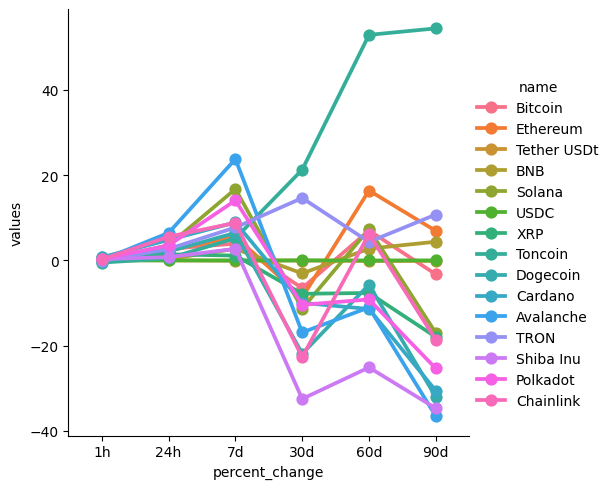

In [28]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [29]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name', 'quote.USD.price', 'timestamp']]
df10

,name,quote.USD.price,timestamp
0,Bitcoin,63210.26082,2024-07-01 16:15:38.353707
1,Ethereum,3467.46271,2024-07-01 16:15:38.353707
2,Tether USDt,0.99861,2024-07-01 16:15:38.353707
3,BNB,577.78731,2024-07-01 16:15:38.353707
4,Solana,148.27490,2024-07-01 16:15:38.353707
5,USDC,0.99986,2024-07-01 16:15:38.353707
6,XRP,0.47915,2024-07-01 16:15:38.353707
7,Toncoin,7.63364,2024-07-01 16:15:38.353707
8,Dogecoin,0.12505,2024-07-01 16:15:38.353707
9,Cardano,0.40404,2024-07-01 16:15:38.353707


In [30]:
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,63210.26082,2024-07-01 16:15:38.353707


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

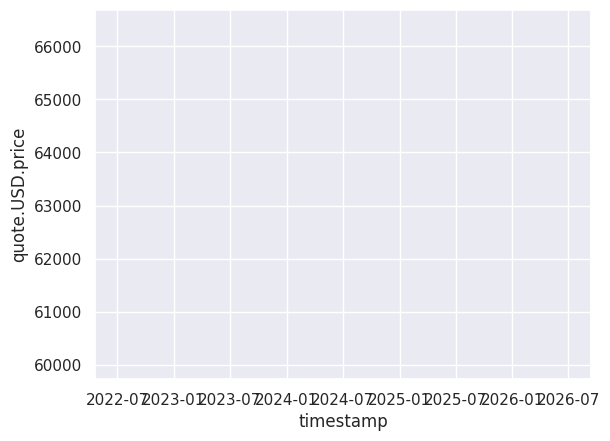

In [31]:
sns.set_theme(style="darkgrid")
sns.lineplot(x='timestamp', y='quote.USD.price', data=df10)

**'''GAME OVER'''**